<a href="https://colab.research.google.com/github/drashti178/CE091_ML_Labs/blob/main/ML_Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test,targets_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Convert to float32.
features_train=np.float32(features_train)
targets_train=np.float32(targets_train)
features_test=np.float32(features_test)
targets_test=np.float32(targets_test)
targets_test

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [ ]:
features_train.shape

(60000, 28, 28)

In [ ]:
#Flatten images to 1-D vector of 784 features (28*28).
features=features_train.flatten()

#Normalize images value from [0, 255] to [0, 1].
targets_train=targets_train/255
targets_test=targets_test/255


In [ ]:
from torch.utils.data import TensorDataset,DataLoader
train_inputs = torch.from_numpy(features_train)
train_outputs = torch.from_numpy(targets_train)
# print(inputs)
# print(outputs)
dataset = TensorDataset(train_inputs,train_outputs)
# print(dataset[:5])

# create feature and targets tensor for test set.
test_inputs = torch.from_numpy(features_test)
test_outputs = torch.from_numpy(targets_test)
dataset = TensorDataset(test_inputs,test_outputs)
print(dataset[:5])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0.,

In [ ]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

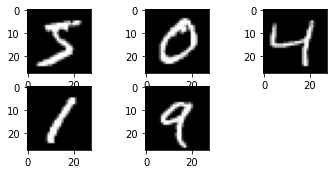

In [ ]:

# example of loading the fashion mnist dataset
from matplotlib import pyplot
# plot first few images
for i in range(5):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(features_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:

# # Create ANN Model
# class ANNModel(nn.Module):

#   def __init__(self, input_dim, hidden_dim, output_dim):
#     super(ANNModel, self).__init__()

input_dim = 28*28
hidden_dim = 150
output_dim = 10

# # Create ANN
# model = ANNModel(input_dim, hidden_dim, output_dim)


class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.first_layer = nn.Linear(features_train, 5)
        self.second_layer = nn.Linear(5, 10)
        self.third_layer = nn.Linear(10, 15)
        self.final_layer = nn.Linear(15,1)
        self.relu = nn.ReLU()

    def forward(self, X_batch):
        layer_out = self.relu(self.first_layer(X_batch))
        layer_out = self.relu(self.second_layer(layer_out))
        layer_out = self.relu(self.third_layer(layer_out))

        return self.final_layer(layer_out)

regressor = Regressor(input_dim,output_dim)

preds = regressor(features_train)

preds

TypeError: ignored